In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime
from datetime import date,datetime
import re
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the Dataset
xls = pd.ExcelFile('Cardiac_Outcomes.xlsx')
#Reading the Hospitalization_Discharge sheet
df_HD = pd.read_excel(xls, 'Hospitalization_Discharge')
#Reading the CardiacComplications sheet
df_CC = pd.read_excel(xls, 'CardiacComplications')
#Reading the Responsivenes sheet
df_R= pd.read_excel(xls, 'Responsivenes')
#Reading the PatientHistory sheet
df_PH = pd.read_excel(xls, 'PatientHistory')
#Reading the Labs sheet
df_L = pd.read_excel(xls, 'Labs')
#Reading the Demography sheet
df_D = pd.read_excel(xls, 'Demography')
#Reading the Patient_Precriptions sheet
df_PP = pd.read_excel(xls, 'Patient_Precriptions')

## Q65. Which Admission Ward has maximum number of visits scheduled?

In [5]:
visits = df_HD['admission_ward'].value_counts()
print("The ward with maximum admission visits: ", visits.idxmax(), visits.max())

The ward with maximum admission visits:  Cardiology 1547


## Q66. Display total count of patients in each discharge_department based on gender?

In [6]:
# first, merged the Hospitalization_discharge and Demography sheets merged to get the discharge_department and gender
# then extract the desired columns data

join_hosdischarge_demography  = pd.merge(df_HD, df_D, on= 'inpatient_number', how = 'inner')
#print(join_hosdischarge_demography )

patients_by_gender = pd.DataFrame(join_hosdischarge_demography,columns =['discharge_department', 'gender']).value_counts()
print(patients_by_gender)

discharge_department  gender
Cardiology            Female    993
                      Male      710
GeneralWard           Female    137
                      Male      104
Others                Female     28
                      Male       24
ICU                   Male        7
                      Female      5
Name: count, dtype: int64


## Q67. How many Unique patients were precribed each type of medication?

In [155]:

patient_prescription=pd.DataFrame(df_PP)
drug_name=df.Drug_name.unique()
print(len(drug_name))
unique_patient=df.groupby('inpatient_number')['Drug_name'].nunique()
print(unique_patient)
result = unique_patient[unique_patient == patient_prescription['Drug_name'].nunique()].index.tolist()
print(result)

25
inpatient_number
123456     4
678910     4
722128     7
723327    12
723617     4
          ..
870258     8
870646     6
879601    13
905163    11
905720     9
Name: Drug_name, Length: 2009, dtype: int64
[]


## Q68. Find 5 patients with the highest Discharge days greater than 20. List their most common outcome

In [96]:
# first got the data with discharge days greater than 20 days. Then by using 'nlargest' got the highest discharge days patients.
discharge_day = df_HD[df_HD['dischargeDay'] > 20]
discharge_day_new =discharge_day[['inpatient_number','dischargeDay','outcome_during_hospitalization']]

print(discharge_day_new.nlargest(5, 'dischargeDay'))


      inpatient_number  dischargeDay outcome_during_hospitalization
884             794077           123                          Alive
1613            768711           118                          Alive
1548            791880            88                          Alive
1573            794784            82                          Alive
1513            757711            76                          Alive


## Q69. Get the list of patient ID's which are not there in prescriptions but in demographics?

In [26]:
#intersection: inpatient number in both sheets Patient prescricptions and list Demographics
np.intersect1d(df_PP['inpatient_number'], df_D['inpatient_number'])

#union of two lists
np.union1d(df_PP['inpatient_number'], df_D['inpatient_number'])

#only in list Patient prescricptions
np.setdiff1d(df_PP['inpatient_number'], df_D['inpatient_number'])

#only in list list Demographics
np.setdiff1d(df_D['inpatient_number'], df_PP['inpatient_number'])


array([789308], dtype=int64)

## Q70. On average, what is the most frequent weekday of admission?

In [62]:
# Create a date range
range_of_dates = pd.date_range(start ='2016-01-01', end = '2019-12-31')

#create a dataframe with the dates
weekday = pd.DataFrame(df_HD, columns = ['Admission_date'])

# add a column with the day of the week
weekday['day_of_week'] = weekday['Admission_date'].dt.dayofweek

#map the day of the week number to its name
weekday['day_of_week'] = weekday['day_of_week'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
  })

print("Most frequent weekday of admission: ", weekday['day_of_week'].value_counts().nlargest(1))

Most frequent weekday of admission:  day_of_week
Monday    308
Name: count, dtype: int64


## Q71. Which year had the maximum admissions?

In [3]:
range_of_dates = pd.Series(pd.date_range(start ='2016-01-01', end = '2019-12-31'))
print("Maximum admissions year:" ,range_of_dates.dt.year.max())

Maximum admissions year: 2019


## Q72. What % of the dataset is male vs female? 

## Q73. Which patient in the youngest age category weighs the most?

## Q74.Which adm ward had the lowest rate of Outcome Death?

In [146]:
admission_outcome = pd.DataFrame(df_HD, columns = ['admission_ward', 'outcome_during_hospitalization'] )

outcome_deadonly= (admission_outcome.loc[admission_outcome['outcome_during_hospitalization']=='Dead'])

print(outcome_deadonly.value_counts().nsmallest(1, 'all'))


admission_ward  outcome_during_hospitalization
GeneralWard     Dead                              1
ICU             Dead                              1
Others          Dead                              1
Name: count, dtype: int64


## Q75. What % of those with an outcome of death, had myocardial infarction?

In [46]:

join_hosdischarge_cardiaccom  = pd.merge(df_HD, df_CC, on= 'inpatient_number', how = 'inner')

count_of_outcome = join_hosdischarge_cardiaccom['outcome_during_hospitalization'].value_counts()
#print(count_of_outcome)
count_of_dead = count_of_outcome.loc['Dead']
print(count_of_dead )

count_of_myocardial = join_hosdischarge_cardiaccom['myocardial_infarction'].value_counts()
print(count_of_myocardial)

patients_by_myo = pd.DataFrame(join_hosdischarge_cardiaccom ,columns =['myocardial_infarction', 'outcome_during_hospitalization']).value_counts()
print(patients_by_myo)

count_of_myo_dead = patients_by_myo.loc[1,'Dead']
print(count_of_myo_dead)
print((count_of_myo_dead/count_of_dead)*100.0)


11
myocardial_infarction
0    1865
1     143
Name: count, dtype: int64
myocardial_infarction  outcome_during_hospitalization
0                      Alive                             1758
1                      Alive                              132
0                      DischargeAgainstOrder               97
                       Dead                                10
1                      DischargeAgainstOrder               10
                       Dead                                 1
Name: count, dtype: int64
1
9.090909090909092


## Q76. What is the ratio of those with congestive heart failure to those who had type of heart failure Both?

## Q77.LIst the number of cardiogenic shock patients based on hospitalization outcome, having a severe GCS score(higher risk of death) 

## Q78.Give the count of patients who have experinced tachicardia or bradycardia.

## Q79. Create a Funnel chart of BMI Category(Normal Weight, Underweight and Obese)

581
1117
313


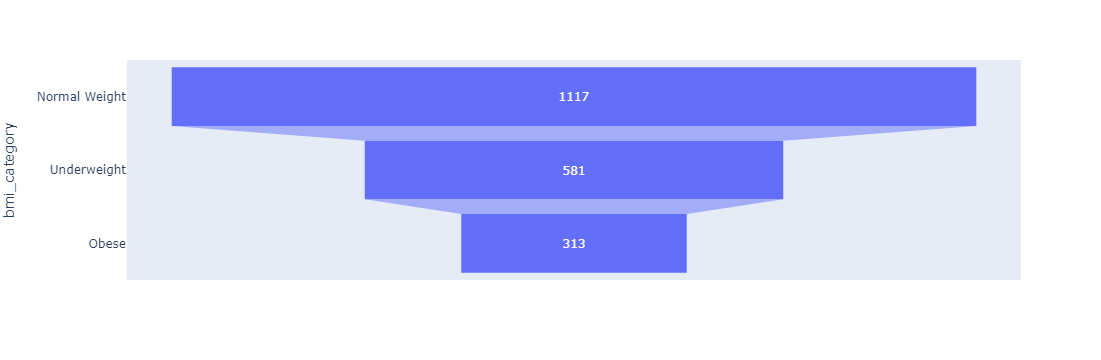

In [77]:
df = pd.DataFrame(df_D)
under_weight = df.loc[(df['BMI']>=0) & (df['BMI']<=18.9), 'BMI']
normal_weight = df.loc[(df['BMI']>=18.9) & (df['BMI']<=25.0), 'BMI']
obese = df.loc[(df['BMI']>=25.0) , 'BMI']
print(under_weight.count())
print(normal_weight.count())
print(obese.count())

bmi_data = dict(
     bmi_range = [normal_weight.count(),under_weight.count(), obese.count()],
    bmi_category = ["Normal Weight", "Underweight", "Obese", ])
funnel_bmi = px.funnel(bmi_data, x ='bmi_range', y='bmi_category')
funnel_bmi.show()

## Q80. Delete the column age from Q26 iteratively.